## import情報

In [1]:
#乱数生成に使用する
from numpy.random import *

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math

import time

## 大まかな目標

2×2マトリックスゲームで、2人のプレイヤー（エージェント）がそれぞれ戦略を持ち、戦略ごとに総当たり（一応、100回）で対戦を行う。その平均が、組み合わせでの獲得利得（報酬）である。これで、対戦による結果表を作る。

次に、対戦結果表をもとに、初期人口を設定し、シミュレーションする（何世代でもOK）。まずは、この基礎手順を実装しよう。

## クラスの定義

さっそく、ゲームのプレイヤー（エージェント）を定義しよう。やることとしては、

・最初は何を出すか

・それ以降は何を出すか

など、選択に関する関数を作ろう。ここが戦略にあたると思う。

次に保存先。自分が100回対戦して得た得点とその対戦者、そして対戦回数（100回だろ、というのは野暮。どうせ回数変更するし）。
これは、対戦者ごとに設定するのが良いかも。

こうして出来上がったクラスを継承して、他の戦略エージェントを定義する。

下のclass、BaseAgentModelは、点数リスト、対戦相手リストを持ち、playによって今何ラウンド目かを表示するもの。ただ、やってみたら変わるかもしれない。

In [2]:
#すべての大本となるエージェントのclass
class BaseAgentModel:

  #自分の名前：
  NAME = "BaseAgentModel"

  #保存先：対戦して得た点数の配列
  score_list = []

  #保存先：対戦者のリスト配列
  opponent_name_list = []

  #保存先：対戦者の1個前の手
  opponent_before_chose = []

  #関数：初期化する
  def listInit(self):
    self.opponent_before_chose = []

  #関数：（関数宣言で第一引数はselfにすること）
  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #0～1を返す乱数
    chose = randint(2)
    print("play: ",round," round: chose ",chose)

    return chose

  #関数：相手の手を記録する
  def memo(self,opponent_chose,matrix=[0,1,2,3,4,5,6,7]):
    self.opponent_before_chose = [opponent_chose]

playをテストしてみた。よさそうだ。

In [3]:
mm = BaseAgentModel()
for i in range(10):
  print(mm.opponent_before_chose)
  mm.play(10)
  mm.memo(0)

[]
play:  10  round: chose  0
[0]
play:  10  round: chose  0
[0]
play:  10  round: chose  1
[0]
play:  10  round: chose  1
[0]
play:  10  round: chose  0
[0]
play:  10  round: chose  1
[0]
play:  10  round: chose  1
[0]
play:  10  round: chose  0
[0]
play:  10  round: chose  0
[0]
play:  10  round: chose  0


継承して、Cだけを選び続けるclassを作ろう、と思ったが、そもそもどういうゲームなの？という定義を忘れていたので、ゲームを定義しよう。

下のclassは、マトリックス情報と、プレイヤー（エージェント）の選択（上か下かがAプレイヤー、右か左かがBプレイヤー。）からスコアを2つ返す関数を持つ。

In [4]:
class MatrixState:

  #マトリックスのリスト
  matrix = [0,0,0,0,
            0,0,0,0]

  #マトリックスを初期化する
  def __init__(self):
    self.matrix = [0,0,0,0,
              0,0,0,0]

  #マトリックスをある値に初期化する
  def __init__(self,a,b,c,d,e,f,g,h):
    self.matrix = [a,b,c,d,
              e,f,g,h]

  def printMatrix(self):
    print(self.matrix)

  def MatrixList(self):
    return [self.matrix[0],self.matrix[1],self.matrix[2],self.matrix[3],self.matrix[4],self.matrix[5],self.matrix[6],self.matrix[7]]

  #値を読みだす
  #choseは0と1。0が上・左、1が下・右
  def getScore(self,chose_player_A,chose_player_B):
    result_index = chose_player_A * 2 + chose_player_B
    
    #indexが3を超えたらエラー
    if result_index > 3:
      print("error: over 3 in index...")
      return 0

    A_score = self.matrix[result_index*2]
    B_score = self.matrix[result_index*2+1]
    #print("A score:",A_score)
    #print("B score:",B_score)

    return A_score,B_score

In [5]:
mmm = MatrixState(1,2,4,5,2,0,2,0)
mmm.printMatrix()
mmm.getScore(1,2)

[1, 2, 4, 5, 2, 0, 2, 0]
error: over 3 in index...


0

さっそくエージェントを定義しよう。すべてAを選ぶ（AllaまたはAllc戦略だね）エージェントを考えよう。もちろん、ベースのclassを継承する。

In [6]:
class AllAAgentModel(BaseAgentModel):

  NAME = "ALL_A"

  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #必ず0（C）を選ぶ
    chose = 0

    #print("play: ",round," round: chose ",chose)

    return chose

定義したclassを確認。問題なく継承されていそうだ。

In [7]:
aa = AllAAgentModel()
aa.play(10)
print(aa.opponent_name_list)
print(aa.score_list)

[]
[]


では早速対戦させてみよう。まずは、すべてCを選ぶ戦略同士で。

対戦させる関数を考えようか。

In [8]:
#マトリックスをA用とB用に変換する
def MatrixAtoB(matrix):
  #print(Aatrix.MatrixList)
  #matrix = Aatrix.MatrixList
  return [matrix[1],matrix[0],matrix[5],matrix[4],matrix[3],matrix[2],matrix[7],matrix[6]]




def Battle(matrix,round,player_A,player_B):

  #まず、記憶を初期化
  player_A.listInit()
  player_B.listInit()

  #print(matrix.matrix)

  matrix_A = matrix.matrix
  #B用に変換
  matrix_B = MatrixAtoB(matrix.matrix)

  A_score = 0
  B_score = 0

  #forループで回数をこなす
  for i in range(round):
    A_chose = player_A.play(i,matrix_A)
    B_chose = player_B.play(i,matrix_B)

    score = matrix.getScore(A_chose,B_chose)

    A_score += score[0]
    B_score += score[1]

    player_A.memo(B_chose)
    player_B.memo(A_chose)

  A_score = A_score / round
  B_score = B_score / round

  #print("result : A = ",A_score,": B = ",B_score)

  return A_score,B_score

問題はなさそうだ。ということは、playをちゃんと設定すれば、うまく動くということだね。

In [9]:
Battle(MatrixState(1,2,3,4,5,6,7,8),100,AllAAgentModel(),AllAAgentModel())

#s = "self"
#o = "other"
#print(MatrixAtoB([s+"cc",o+"cc",s+"cd",o+"cd",s+"dc",o+"dc",s+"dd",o+"dd"]))

(1.0, 2.0)

じゃあ、教科書のマトリックスをPD_matとして、これからはこれを使うとしよう。
あと、ラウンド数も100回にしよう。

In [10]:
PD_mat = MatrixState(6,6,0,8,8,0,2,2)

ROUND_N = 100

すべて1（D）を選ぶエージェントの定義は、0（C）の場合をそのまま使えるね。

In [11]:
class AllBAgentModel(BaseAgentModel):

  NAME = "ALL_B"

  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #必ず1（D）を選ぶ
    chose = 1

    #print("play: ",round," round: chose ",chose)

    return chose

次はランダムだけど、大本と同じだね。

In [12]:
class RandomAgentModel(BaseAgentModel):

  #自分の名前：
  NAME = "Random"

  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #0～1を返す乱数、つまり0か1を返す
    chose = randint(2)
    #print("play: ",round," round: chose ",chose)

    return chose

とりあえず、この3戦略で試合をして、表を作る。

In [13]:
#リスト：3×3になるかな（厳密には、4×4だろうけど）
result_list_01 = []

#参加者の名前リスト
join_name_list = []

#参加者のインスタンスのリスト
join_instance_list = []

#戦略のエージェントを用意
All_A_01 = AllAAgentModel()
All_B_01 = AllBAgentModel()
Random_01 = RandomAgentModel()

join_name_list.append(All_A_01.NAME)
join_name_list.append(All_B_01.NAME)
join_name_list.append(Random_01.NAME)

print(join_name_list)

join_instance_list.append(All_A_01)
join_instance_list.append(All_B_01)
join_instance_list.append(Random_01)

for i in range(len(join_instance_list)):
  
  #結果のリスト
  result_list = [join_instance_list[i].NAME]

  for j in range(len(join_instance_list)):
    #対戦を入れる
    result_list.append(Battle(PD_mat,ROUND_N,join_instance_list[i],join_instance_list[j])[0])

  #総当たりが終わったら、結果のリストを4×4のリストに入れる
  result_list_01.append(result_list)


#最初に入れる
join_name_list.insert(0,"none")
result_list_01.insert(0,join_name_list)

#print(result_list_01)

print()
for i in range(len(result_list_01)):
    for j in range(len(result_list_01[i])):
        print("{:10}".format(result_list_01[i][j]), end="")
    print()  # 行ごとの改行のため

['ALL_A', 'ALL_B', 'Random']

none      ALL_A     ALL_B     Random    
ALL_A            6.0       0.0      2.94
ALL_B            8.0       2.0      5.12
Random          6.88      0.92      4.46


ふむふむ。だいたい教科書と同じ値になりましたな。

手順をまとめると、

・結果表示リストの用意（あとで計算に使える）

・参加する戦略の名前リスト（多分いらない。参照して後から追加すればよし）

・参加する戦略の実際のインスタンスのリスト（重要。参照先をリスト管理すれば、forループだけど簡単にシミュレーションできる。）

・インスタンスの宣言とリストに投入

・実際に、リスト数だけ対戦していく。

・結果を表に出力

という感じだね。参加する戦略リストを引数にすれば、関数にできそう。

In [14]:
#参加する戦略のclassのリストを受け取る。
def BattleResultList(join_instance_list,matrix_list,round_n=ROUND_N):

  #リスト：3×3になるかな（厳密には、4×4だろうけど）
  battle_result_list = []

  #参加者の名前リスト
  join_name_list = []

  #人数分、名前を追加
  #最初に空白を入れる
  join_name_list.append("none")

  for i in range(len(join_instance_list)):
    join_name_list.append(join_instance_list[i].NAME)

  #第1列目に投入
  battle_result_list.append(join_name_list)

  for i in range(len(join_instance_list)):
    
    #結果のリスト
    result_list = [join_instance_list[i].NAME]

    for j in range(len(join_instance_list)):
      #対戦を入れる
      result_list.append(Battle(matrix_list,round_n,join_instance_list[i],join_instance_list[j])[0])

    #総当たりが終わったら、結果のリストを4×4のリストに入れる
    battle_result_list.append(result_list)

  #print(battle_result_list)

  #print()
  #for i in range(len(battle_result_list)):
      #for j in range(len(battle_result_list[i])):
          #print("{:10}".format(battle_result_list[i][j]), end="")
      #print()  # 行ごとの改行のため

  #正規化
  

  return battle_result_list

関数化した。うまく動いていそうだ。

In [15]:
mya = BattleResultList(join_instance_list,PD_mat)

しっぺ返し戦略を定義しよう。記憶が必要になり、少しだけ複雑になるぞ。

ここで、記憶できるよう、大本にmemo関数を追加した。ここからは、このmemo関数も利用するよ。

In [16]:
class TFTAgentModel(BaseAgentModel):

  #自分の名前：
  NAME = "TFT"

  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #前の手がないなら、0を選ぶ
    if len(self.opponent_before_chose) == 0:
      chose = 0

    else:
      if self.opponent_before_chose[0] == 0:
        chose = 0
      else:
        chose = 1

    #print("play: ",round," round: chose ",chose)

    return chose

  def memo(self,opponent_chose,matrix=[0,1,2,3,4,5,6,7]):
    self.opponent_before_chose = [opponent_chose]

大丈夫そうだ。じゃあ、戦略をすべてにしよう。

In [17]:
#戦略のエージェントを用意
All_A_02 = AllAAgentModel()
All_B_02 = AllBAgentModel()
Random_02 = RandomAgentModel()
TFT_02 = TFTAgentModel()

#参加者のインスタンスのリスト
join_instance_list = [All_A_02,All_B_02,Random_02,TFT_02]

mya_2 = BattleResultList(join_instance_list,PD_mat)

半返し戦略（TFTT）。2回1を選ばれたら1を選ぶ（報復は半分）

In [18]:
class TFTTAgentModel(BaseAgentModel):

  #自分の名前：
  NAME = "TFTT"

  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #前の手がないなら、0を選ぶ
    if len(self.opponent_before_chose) == 0:
      chose = 0

    else:
      if len(self.opponent_before_chose) == 1:
        chose = 0

      else:
        if self.opponent_before_chose[0] == 1 and self.opponent_before_chose[1] == 1:
          chose = 1
        else:
          chose = 0

    #print("play: ",round," round: chose ",chose)

    return chose

  def memo(self,opponent_chose,matrix=[0,1,2,3,4,5,6,7]):
    if len(self.opponent_before_chose) == 0 or len(self.opponent_before_chose) == 1:
      self.opponent_before_chose.append(opponent_chose)
    else:
      self.opponent_before_chose[0] = self.opponent_before_chose[1]
      self.opponent_before_chose[1] = opponent_chose

倍返し戦略（TTFAT）。1を選ばれたら、2回1を選ぶ（倍の報復）。

In [19]:
class TTFATAgentModel(BaseAgentModel):

  #自分の名前：
  NAME = "TTFAT"

  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #前の手がないなら、0を選ぶ
    if len(self.opponent_before_chose) == 0:
      chose = 0

    else:
      if len(self.opponent_before_chose) == 1:
        if self.opponent_before_chose[0] == 1:
          chose = 1
        else:
          chose = 0

      else:
        if self.opponent_before_chose[0] == 1 or self.opponent_before_chose[1] == 1:
          chose = 1
        else:
          chose = 0

    #print("play: ",round," round: chose ",chose)

    return chose

  def memo(self,opponent_chose,matrix=[0,1,2,3,4,5,6,7]):
    if len(self.opponent_before_chose) == 0 or len(self.opponent_before_chose) == 1:
      self.opponent_before_chose.append(opponent_chose)
    else:
      self.opponent_before_chose[0] = self.opponent_before_chose[1]
      self.opponent_before_chose[1] = opponent_chose

トリガー戦略（Trigger）。1回でも1を選ばれると、それ以降、ずっと1を選ぶ。

In [20]:
class TriggerAgentModel(BaseAgentModel):

  #自分の名前：
  NAME = "Trigger"

  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #前の手がないなら、0を選ぶ
    if len(self.opponent_before_chose) == 0:
      chose = 0

    else:
      if self.opponent_before_chose[0] == 1:
        chose = 1
      else:
        chose = 0

    #print("play: ",round," round: chose ",chose)

    return chose

  def memo(self,opponent_chose,matrix=[0,1,2,3,4,5,6,7]):
    if len(self.opponent_before_chose) == 0:
      self.opponent_before_chose.append(opponent_chose)
    else:
      if opponent_chose == 1:
        self.opponent_before_chose[0] = opponent_chose

In [21]:
TFTT_03 = TFTTAgentModel()
TTFAT_03 = TTFATAgentModel()
Trigger_03 = TriggerAgentModel()

#参加者のインスタンスのリスト
join_instance_list = [All_A_02,All_B_02,Random_02,TFT_02,TFTT_03,TTFAT_03,Trigger_03]

mya_3 = BattleResultList(join_instance_list,PD_mat)

とりあえず、トリガー戦略までできたので、次は人口シミュにいこう。

今度、保存すべきなのは、

・それぞれの人口（そして推移）

・総人口（計算に必要）

それぞれの人口は、戦略との点数×その戦略の人口　を戦略ごとで計算し合計。これが点数になる。戦略ですべて計算したら、合計して、総人口で割ることで1人の平均点が出る。

その後、人口を変化させる。元の人口×点数÷平均点。平均点とどれくらい差があるかで、増えるか減るかが決まる、ということだ。

早速やっていこう。

In [58]:
def EvoSimu(generation_N,battle_result_list,population_N):
  #初期の人口リスト
  population_list = [[population_N] * (len(battle_result_list) - 1)]
  #print(population_list)

  #点数のリスト
  score_list = [[]]

  for k in  range(generation_N):
    ave_score = 0
    population = sum(population_list[k])
    #print(population)

    for i in range(1,len(battle_result_list)):
      sum_score = 0

      for j in range(1,len(battle_result_list[i])):
        sum_score += population_list[k][j-1] * battle_result_list[i][j]

      score_list[k].append(sum_score)
      ave_score += sum_score * population_list[k][i-1]

    #print(ave_score)
    ave_score = ave_score / population
    #print(ave_score)

    population_list.append([])

    for i in range(1,len(battle_result_list)):
      result_population = population_list[k][i-1] * score_list[k][i-1] / ave_score

      population_list[k+1].append(result_population)

    if k < generation_N:
      score_list.append([])

  #print(population_list)
  #print(score_list)

  return population_list

evo_result_list = EvoSimu(100,mya_3,100)

できたので、プロットしてみよう

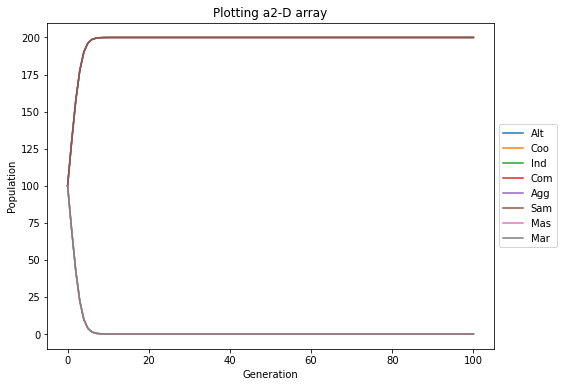

In [59]:
def plotSimuResult(evo_result_list,battle_result_list):
  y = np.array(evo_result_list).T

  figure(figsize = (8, 6))
  x = np.array(range(0, 101))

  plt.title("Plotting a2-D array")
  plt.xlabel("Generation")
  plt.ylabel("Population")

  for i, array in enumerate(y):
    plt.plot(x, array, label = battle_result_list[i+1][0])
    
  plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
  plt.show()

plotSimuResult(evo_result_list,mya_3)

うまくいったようだ。変えられるよう、関数にしてしまうおう。

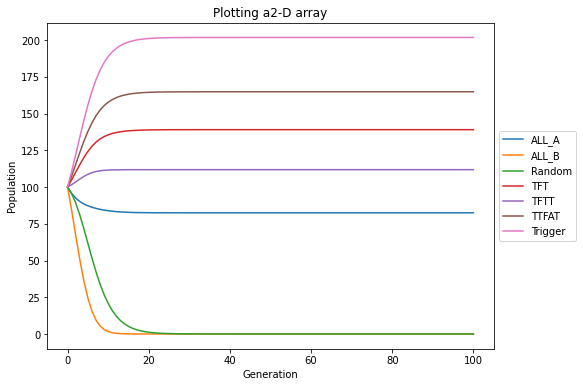

In [24]:
KK_mat = MatrixState(10,10,0,24,24,0,2,2)

ROUND_N = 100

#戦略のエージェントを用意
All_A_02 = AllAAgentModel()
All_B_02 = AllBAgentModel()
Random_02 = RandomAgentModel()
TFT_02 = TFTAgentModel()
TFTT_03 = TFTTAgentModel()
TTFAT_03 = TTFATAgentModel()
Trigger_03 = TriggerAgentModel()

#参加者のインスタンスのリスト
join_instance_list = [All_A_02,All_B_02,Random_02,TFT_02,TFTT_03,TTFAT_03,Trigger_03]

mya_3 = BattleResultList(join_instance_list,KK_mat)

evo_result_list = EvoSimu(100,mya_3,100)

plotSimuResult(evo_result_list,mya_3)

SVOに基づくエージェントを作ろう。



In [25]:
class SVOAgentModel(BaseAgentModel):

  #自分の名前：
  NAME = "SVO"

  angle = 0

  other_w = math.sin(math.radians(angle))
  self_w = math.cos(math.radians(angle))

  def __init__(self,NAME,angle):
    self.NAME = NAME
    self.angle = angle
    self.other_w = math.sin(math.radians(angle))
    self.self_w = math.cos(math.radians(angle))

    #print(self.self_w,self.other_w)

  def play(self,round,matrix=[0,1,2,3,4,5,6,7]):

    #重きによる計算
    row_A = matrix[0] * self.self_w + matrix[1] * self.other_w + matrix[2] * self.self_w + matrix[3] * self.other_w
    row_B = matrix[4] * self.self_w + matrix[5] * self.other_w + matrix[6] * self.self_w + matrix[7] * self.other_w

    row = row_A - row_B
    #print(row)

    #Aの方が価値が高いなら0を選ぶ
    if row >= 0:
      chose = 0

    else:
      chose = 1

    return chose

テスト。まあ動いている様子。丸め誤差は気になるが

In [26]:
a_a = SVOAgentModel("90",-45)
a_a.play(20,[2,2,0,3,3,0,1,1])

1

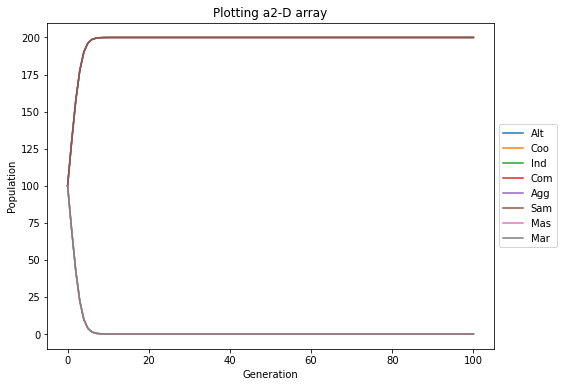

In [27]:
KK_mat = MatrixState(60,60,10,100,100,10,30,30)

ROUND_N = 100

#戦略のエージェントを用意
Alt = SVOAgentModel("Alt",90)
Coo = SVOAgentModel("Coo",45)
Ind = SVOAgentModel("Ind",0)
Com = SVOAgentModel("Com",315)
Agg = SVOAgentModel("Agg",270)
Sam = SVOAgentModel("Sam",225)
Mas = SVOAgentModel("Mas",180)
Mar = SVOAgentModel("Mar",135)

#参加者のインスタンスのリスト
join_instance_list = [Alt,Coo,Ind,Com,Agg,Sam,Mas,Mar]

mya_3 = BattleResultList(join_instance_list,KK_mat)

evo_result_list = EvoSimu(100,mya_3,100)

plotSimuResult(evo_result_list,mya_3)

さて。ここまでやってきて、Joireman1996の再現だが、もう一度読んだ結果、以下のような手順だったらしい。

・60000回を各ペアで行う。

・60000回のゲームは、8つのペイオフ値がすべて乱数で決めており、0から1の一様分布で生成している。

・エージェントが得た結果は、60000回の平均値である（だから0～1の範囲）

なるほど。まず、ゲームを変え、ペアを変え、というわけだあ（今のところ、ペアを変えてゲーム固定なので、足してから割るのが良いか）。



In [28]:
def JoiSimu(game_N=100):
  KK_mat = MatrixState(0,0,0,0,0,0,0,0)

  ROUND_N = 1

  #戦略のエージェントを用意
  Alt = SVOAgentModel("Alt",90)
  Coo = SVOAgentModel("Coo",45)
  Ind = SVOAgentModel("Ind",0)
  Com = SVOAgentModel("Com",315)
  Agg = SVOAgentModel("Agg",270)
  Sam = SVOAgentModel("Sam",225)
  Mas = SVOAgentModel("Mas",180)
  Mar = SVOAgentModel("Mar",135)

  #参加者のインスタンスのリスト
  join_instance_list = [Alt,Coo,Ind,Com,Agg,Sam,Mas,Mar]

  mya_3 = BattleResultList(join_instance_list,KK_mat)

  #mal_mat = (MatrixState(np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand()),game_N)
  #print(mal_mat)

  for i in range(game_N):
    #0以上～1未満を返す一様分布
    #print(np.random.rand())
    KK_mat = (MatrixState(np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand()))
    #mya_4 = BattleResultList(join_instance_list,KK_mat)
    mya_4 = BattleResultList(join_instance_list,KK_mat)

    for k in range(1,len(mya_3)):
      for j in range(1,len(mya_3[k])):
        mya_3[k][j] += mya_4[k][j]

  #KK_mat = MatrixState(np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand())

  #mya_4 = BattleResultList(join_instance_list,KK_mat)

  for i in range(1,len(mya_3)):
    for j in range(1,len(mya_3[i])):
        mya_3[i][j] = mya_3[i][j] / game_N

  print()
  for i in range(len(mya_3)):
      for j in range(len(mya_3[i])):
        if i == 0  or j == 0:
          print("{:10}".format(mya_3[i][j]), end="")
        else:
          print("{:10.3f}".format(mya_3[i][j]), end="")
      print()  # 行ごとの改行のため


#一様乱数を1,000件生成
#x = np.random.rand(1000)
 
# ヒストグラムを出力
#plt.hist(x)

JoiSimu(100)


none      Alt       Coo       Ind       Com       Agg       Sam       Mas       Mar       
Alt            0.639     0.586     0.495     0.393     0.367     0.420     0.511     0.613
Coo            0.711     0.678     0.564     0.478     0.446     0.479     0.593     0.679
Ind            0.725     0.697     0.595     0.519     0.491     0.519     0.621     0.697
Com            0.727     0.690     0.592     0.503     0.457     0.494     0.593     0.682
Agg            0.610     0.596     0.490     0.415     0.376     0.390     0.496     0.571
Sam            0.538     0.503     0.421     0.330     0.298     0.332     0.414     0.506
Mas            0.524     0.484     0.390     0.289     0.252     0.292     0.386     0.487
Mar            0.522     0.491     0.393     0.306     0.286     0.317     0.415     0.502


In [29]:
#参加する戦略のclassのリストを受け取る。
def JoiBattleResultList(join_instance_list,round_n=1):

  #リスト：3×3になるかな（厳密には、4×4だろうけど）
  battle_result_list = []

  #参加者の名前リスト
  join_name_list = []

  #人数分、名前を追加
  #最初に空白を入れる
  join_name_list.append("none")

  for i in range(len(join_instance_list)):
    join_name_list.append(join_instance_list[i].NAME)

  #第1列目に投入
  battle_result_list.append(join_name_list)

  for i in range(len(join_instance_list)):
    
    #結果のリスト
    result_list = [join_instance_list[i].NAME]

    for j in range(len(join_instance_list)):
      matrix_list = (MatrixState(np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand()))
      #対戦を入れる
      result_list.append(Battle(matrix_list,round_n,join_instance_list[i],join_instance_list[j])[0])

    #総当たりが終わったら、結果のリストを4×4のリストに入れる
    battle_result_list.append(result_list)

  #print(battle_result_list)

  #print()
  #for i in range(len(battle_result_list)):
      #for j in range(len(battle_result_list[i])):
          #print("{:10}".format(battle_result_list[i][j]), end="")
      #print()  # 行ごとの改行のため

  #正規化
  

  return battle_result_list

JoiBattleResultList(join_instance_list)

[['none', 'Alt', 'Coo', 'Ind', 'Com', 'Agg', 'Sam', 'Mas', 'Mar'],
 ['Alt',
  0.7494873510210079,
  0.925809186760602,
  0.4395038002527649,
  0.7920219780223146,
  0.5541034995054158,
  0.7678822956015333,
  0.7968691935881737,
  0.2359967078473708],
 ['Coo',
  0.5819814660455513,
  0.6062820699662029,
  0.7779405315410394,
  0.08928719874252944,
  0.37647344315334574,
  0.04656943421303139,
  0.8528024157524476,
  0.9948442682245441],
 ['Ind',
  0.595673351439991,
  0.9371345275215306,
  0.7020975325854822,
  0.47323008576954795,
  0.9224628545455621,
  0.3457771811578625,
  0.3045008119154641,
  0.6345180604920676],
 ['Com',
  0.5176728253795999,
  0.6107017007422433,
  0.3419369152177286,
  0.9547345702373301,
  0.279029035262914,
  0.9500209049212696,
  0.012597105163679512,
  0.4228287787280903],
 ['Agg',
  0.3533405314556296,
  0.0045758713824090025,
  0.8296912862354561,
  0.6084364703621339,
  0.9942777470616214,
  0.14918314206814764,
  0.0770600484240338,
  0.699616724437532

In [71]:
def JoiSimu_JoiBattle(game_N=100):
  KK_mat = MatrixState(0,0,0,0,0,0,0,0)

  ROUND_N = 1

  #戦略のエージェントを用意
  Alt = SVOAgentModel("Alt",90)
  Coo = SVOAgentModel("Coo",45)
  Ind = SVOAgentModel("Ind",0)
  Com = SVOAgentModel("Com",315)
  Agg = SVOAgentModel("Agg",270)
  Sam = SVOAgentModel("Sam",225)
  Mas = SVOAgentModel("Mas",180)
  Mar = SVOAgentModel("Mar",135)

  #参加者のインスタンスのリスト
  join_instance_list = [Alt,Coo,Ind,Com,Agg,Sam,Mas,Mar]

  mya_3 = BattleResultList(join_instance_list,KK_mat)

  #mal_mat = (MatrixState(np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand()),game_N)
  #print(mal_mat)

  for i in range(game_N):
    #0以上～1未満を返す一様分布
    #print(np.random.rand())
    #KK_mat = (MatrixState(np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand()))
    #mya_4 = BattleResultList(join_instance_list,KK_mat)
    mya_4 = JoiBattleResultList(join_instance_list)

    for k in range(1,len(mya_3)):
      for j in range(1,len(mya_3[k])):
        mya_3[k][j] += mya_4[k][j]

  #KK_mat = MatrixState(np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand(),np.random.rand())

  #mya_4 = BattleResultList(join_instance_list,KK_mat)

  for i in range(1,len(mya_3)):
    for j in range(1,len(mya_3[i])):
        mya_3[i][j] = mya_3[i][j] / game_N

  print()
  for i in range(len(mya_3)):
      for j in range(len(mya_3[i])):
        if i == 0  or j == 0:
          print("{:10}".format(mya_3[i][j]), end="")
        else:
          print("{:10.3f}".format(mya_3[i][j]), end="")
      print()  # 行ごとの改行のため


#一様乱数を1,000件生成
#x = np.random.rand(1000)
 
# ヒストグラムを出力
#plt.hist(x)

JoiSimu(1000)


none      Alt       Coo       Ind       Com       Agg       Sam       Mas       Mar       
Alt            0.610     0.584     0.506     0.420     0.393     0.419     0.497     0.582
Coo            0.694     0.663     0.586     0.497     0.465     0.496     0.573     0.662
Ind            0.737     0.699     0.623     0.528     0.485     0.523     0.599     0.695
Com            0.702     0.657     0.580     0.488     0.446     0.491     0.568     0.660
Agg            0.609     0.570     0.502     0.407     0.368     0.407     0.476     0.570
Sam            0.525     0.490     0.421     0.330     0.296     0.331     0.400     0.490
Mas            0.481     0.455     0.384     0.300     0.276     0.303     0.373     0.458
Mar            0.517     0.497     0.427     0.339     0.315     0.335     0.405     0.493


ふむ。結果としては、前半は60000ゲームを8戦略ペアで、後半は8戦略ペアで60000ゲームずつ（後半の方が生成ゲームは多い）。

計算時間は、10000ゲームで3分ほど（180秒）。長いっすね。60000を試そうとしたが、ちょっとあきらめ（18分は待てない、気分的に）。

となると計算時間を減らす工夫が必要なわけだが。。。

計算量を減らした場合の関数を考えた。

In [31]:
# 開始
start_time = time.perf_counter()
#Alt_ = SVOAgentModel("Alt",90)
#Alt_.play(1)
# 終了
end_time = time.perf_counter()

# 経過時間を出力(秒)
elapsed_time = end_time - start_time
elapsed_time = elapsed_time * 2 * 8 * 8 * 60000
print(elapsed_time)

231.1680000002525


In [32]:
A_mat = np.random.random((60000,8))
B_mat = A_mat[ : , [1,0,5,4,3,2,7,6]]

print(A_mat)
print(B_mat)

[[0.3381091  0.85537856 0.6643639  ... 0.29641777 0.89034927 0.6176631 ]
 [0.49766278 0.60966533 0.5780866  ... 0.03796885 0.20275655 0.7549373 ]
 [0.62717726 0.72561317 0.69448731 ... 0.86867999 0.66050598 0.24966245]
 ...
 [0.02307368 0.29000657 0.88692707 ... 0.72261146 0.43814858 0.03599147]
 [0.02225676 0.7520317  0.69828048 ... 0.68998848 0.50608065 0.07387714]
 [0.6741526  0.08499479 0.79860877 ... 0.73686083 0.81158448 0.16329498]]
[[0.85537856 0.3381091  0.29641777 ... 0.6643639  0.6176631  0.89034927]
 [0.60966533 0.49766278 0.03796885 ... 0.5780866  0.7549373  0.20275655]
 [0.72561317 0.62717726 0.86867999 ... 0.69448731 0.24966245 0.66050598]
 ...
 [0.29000657 0.02307368 0.72261146 ... 0.88692707 0.03599147 0.43814858]
 [0.7520317  0.02225676 0.68998848 ... 0.69828048 0.07387714 0.50608065]
 [0.08499479 0.6741526  0.73686083 ... 0.79860877 0.16329498 0.81158448]]


In [33]:
A_self_w = math.cos(math.radians(90))
A_other_w = math.sin(math.radians(90))

A_w = np.array([A_self_w,A_other_w,A_self_w,A_other_w,-A_self_w,-A_other_w,-A_self_w,-A_other_w])

A_result = np.dot(A_mat,A_w)
print(A_result)
A_result = np.where(A_result >= 0, 0,1)
print(A_result)

B_self_w = math.cos(math.radians(90))
B_other_w = math.sin(math.radians(90))

B_w = np.array([B_self_w,B_other_w,B_self_w,B_other_w,-B_self_w,-B_other_w,-B_self_w,-B_other_w])

B_result = np.dot(B_mat,B_w)
print(B_result)
B_result = np.where(B_result >= 0, 0,1)
print(B_result)

print()
A_score_array = ( 2 * A_result + B_result ) * 2
print(A_score_array)
B_score_array = ( 2 * B_result + A_result ) * 2
print(B_score_array)

A_score = 0
B_score = 0
for i in range(len(A_score_array)):
  A_score += A_mat[i][A_score_array[i]]
  B_score += B_mat[i][B_score_array[i]]

A_score = A_score / len(A_score_array)
print("{:.3f}".format(A_score))
B_score = B_score / len(B_score_array)
print("{:.3f}".format(B_score))


[ 0.3012406   0.36008797  0.01909336 ...  0.01113458  0.65504299
 -0.15723033]
[0 0 0 ... 0 0 1]
[-1.20647585  0.19361208 -0.09736159 ... -0.89632548 -0.29191056
 -0.72658342]
[1 0 1 ... 1 1 1]

[2 0 2 ... 2 2 6]
[4 0 4 ... 4 4 6]
0.617
0.617


In [45]:
def JoiSimuFaster(game_N,A_angle,B_angle):
  #print("test start")
  A_mat = np.random.random((game_N,8))
  B_mat = A_mat[ : , [1,0,5,4,3,2,7,6]]

  A_self_w = math.cos(math.radians(A_angle))
  A_other_w = math.sin(math.radians(A_angle))
  A_w = np.array([A_self_w,A_other_w,A_self_w,A_other_w,-A_self_w,-A_other_w,-A_self_w,-A_other_w])
  A_result = np.dot(A_mat,A_w)
  A_result = np.where(A_result >= 0, 0,1)

  B_self_w = math.cos(math.radians(B_angle))
  B_other_w = math.sin(math.radians(B_angle))
  B_w = np.array([B_self_w,B_other_w,B_self_w,B_other_w,-B_self_w,-B_other_w,-B_self_w,-B_other_w])
  B_result = np.dot(B_mat,B_w)
  B_result = np.where(B_result >= 0, 0,1)

  A_score_array = ( 2 * A_result + B_result ) * 2
  B_score_array = ( 2 * B_result + A_result ) * 2

  A_score = 0
  B_score = 0
  for i in range(game_N):
    A_score += A_mat[i][A_score_array[i]]
    B_score += B_mat[i][B_score_array[i]]

  A_score = A_score / game_N
  #print("{:.3f}".format(A_score))
  B_score = B_score / game_N
  #print("{:.3f}".format(B_score))

  return B_score

In [66]:
JoiSimuFaster(60000,90,90)

0.6164074211750931

In [69]:

SVO_name_list = ["Alt","Coo","Ind","Com","Agg","Sam","Mas","Mar"]
SVO_angle_list = [90,45,0,-45,-90,-135,180,135]

ss_result_list = [["none"]+SVO_name_list]

for i in range(len(SVO_angle_list)):
  a = [SVO_name_list[i]]
  for j in range(len(SVO_angle_list)):
    a.append(JoiSimuFaster(60000,SVO_angle_list[i],SVO_angle_list[j]))
  ss_result_list.append(a)

for i in range(len(ss_result_list)):
  for j in range(len(ss_result_list[i])):
    if i == 0  or j == 0:
      print("{:10}".format(ss_result_list[i][j]), end="")
    else:
      print("{:10.3f}".format(ss_result_list[i][j]), end="")
  print()  # 行ごとの改行のため

none      Alt       Coo       Ind       Com       Agg       Sam       Mas       Mar       
Alt            0.618     0.698     0.736     0.698     0.615     0.536     0.499     0.534
Coo            0.583     0.663     0.699     0.663     0.581     0.499     0.467     0.498
Ind            0.502     0.580     0.616     0.581     0.502     0.418     0.383     0.418
Com            0.417     0.500     0.535     0.499     0.416     0.337     0.301     0.336
Agg            0.382     0.463     0.500     0.466     0.385     0.302     0.267     0.300
Sam            0.416     0.499     0.534     0.500     0.418     0.337     0.302     0.336
Mas            0.499     0.583     0.617     0.583     0.498     0.418     0.380     0.418
Mar            0.581     0.663     0.697     0.664     0.582     0.499     0.464     0.499


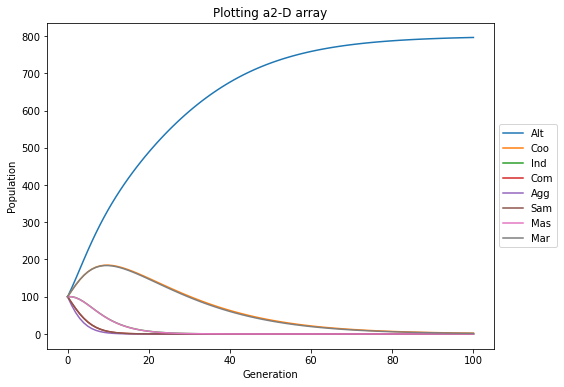

In [70]:
evo_result_gene = EvoSimu(100,ss_result_list,100)

plotSimuResult(evo_result_gene,ss_result_list)

In [8]:
import time

t1 = time.time() 

for i in range(60000):
    for j in range(1000):
        for k in range(8):
            a = 4+2
        a = 2+2
    if i%10000 == 0:
        print(a)
    a = 1+1
    
t2 = time.time()

print(t2-t1)

4
4
4
4
4
4
28.004862308502197
